In [1]:
from exojax.spec import xsection
from exojax.spec.hitran import SijT, doppler_sigma, gamma_hitran, gamma_natural
from exojax.spec import moldb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import jax.numpy as jnp
from exojax.spec.dit import xsmatrix, xsvector, set_ditgrid
plt.style.use('bmh')

/home/kawahara/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
# Setting wavenumber bins and loading HITRAN database
nus=np.linspace(1900.0,2300.0,80000,dtype=np.float64) 
mdbCO=moldb.MdbHit('05_hit12.par',nus)

In [10]:
Mmol=28.010446441149536 # molecular weight
Tfix=1000.0 # we assume T=1000K
Pfix=1.e-3 # we compute P=1.e-3 bar
Ppart=Pfix #partial pressure of CO. here we assume a 100% CO atmosphere.
qt=mdbCO.Qr_layer_HAPI([Tfix])[0]

In [11]:
Sij=SijT(Tfix,mdbCO.logsij0,mdbCO.nu_lines,mdbCO.elower,qt)
gammaL = gamma_hitran(Pfix,Tfix, Ppart, mdbCO.n_air, \
                      mdbCO.gamma_air, mdbCO.gamma_self) \
+ gamma_natural(mdbCO.A)
# thermal doppler sigma
sigmaD=doppler_sigma(mdbCO.nu_lines,Tfix,Mmol)

Checking the range of doppler and Lorentz widths

In [12]:
sigmaD_grid=set_ditgrid(sigmaD)
gammaL_grid=set_ditgrid(gammaL)

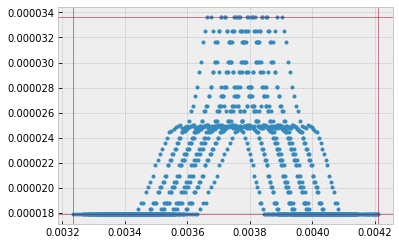

In [13]:
plt.plot(sigmaD,gammaL,".")
for i in sigmaD_grid:
    plt.axvline(i,lw=1,alpha=0.5,color="C1")
for i in gammaL_grid:
    plt.axhline(i,lw=1,alpha=0.5,color="C1")

In [14]:
xs=xsvector(mdbCO.nu_lines,sigmaD,gammaL,Sij,nus,sigmaD_grid,gammaL_grid)

In [19]:
xsv=xsection(nus,mdbCO.nu_lines,sigmaD,gammaL,Sij,memory_size=30) 

100%|██████████| 15/15 [00:01<00:00, 13.81it/s]


Text(0, 0.5, 'Difference (cm2)')

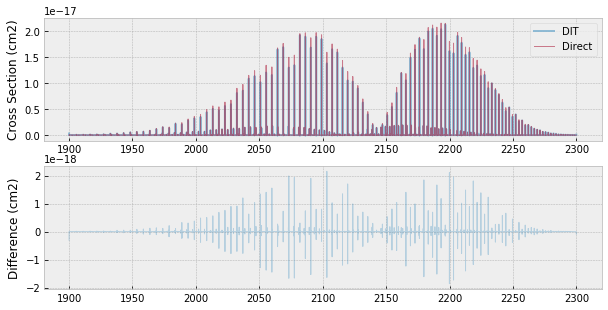

In [36]:
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(211)
plt.plot(nus,xs,lw=2,alpha=0.5,label="DIT")
plt.plot(nus,xsv,lw=1,alpha=0.5,label="Direct")
plt.legend()
plt.ylabel("Cross Section (cm2)")
ax=fig.add_subplot(212)
plt.plot(nus,xsv-xs,lw=1,alpha=0.3)
plt.ylabel("Difference (cm2)")
#plt.yscale("log")

(2050.8, 2050.9)

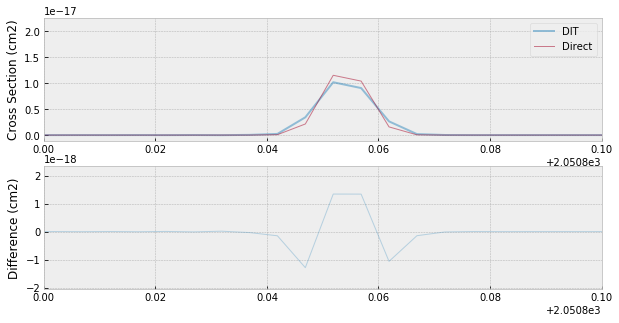

In [43]:
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(211)
plt.plot(nus,xs,lw=2,alpha=0.5,label="DIT")
plt.plot(nus,xsv,lw=1,alpha=0.5,label="Direct")
plt.legend()
plt.xlim(2050.8,2050.9)
plt.ylabel("Cross Section (cm2)")
ax=fig.add_subplot(212)
plt.plot(nus,xsv-xs,lw=1,alpha=0.3)
plt.ylabel("Difference (cm2)")
plt.xlim(2050.8,2050.9)
#plt.yscale("log")